In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\test_FD001 (1).csv")


# Understanding the dataset

In [6]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (13096, 27)


In [7]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1   0.0023   0.0003    100.0   518.67   643.02  1585.29   
1       1       2  -0.0027  -0.0003    100.0   518.67   641.71  1588.45   
2       1       3   0.0003   0.0001    100.0   518.67   642.46  1586.94   
3       1       4   0.0042   0.0000    100.0   518.67   642.44  1584.12   
4       1       5   0.0014   0.0000    100.0   518.67   642.51  1587.19   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1398.21    14.62  ...   2388.03   8125.55    8.4052      0.03       392   
1  1395.42    14.62  ...   2388.06   8139.62    8.3803      0.03       393   
2  1401.34    14.62  ...   2388.03   8130.10    8.4441      0.03       393   
3  1406.42    14.62  ...   2388.05   8132.90    8.3917      0.03       391   
4  1401.92    14.62  ...   2388.03   8129.54    8.4031      0.03       390   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [8]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [9]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            13096 non-null  int64  
 1   Cycles            13096 non-null  int64  
 2   Sensor1           13096 non-null  float64
 3   Sensor2           13096 non-null  float64
 4   Sensor3           13096 non-null  float64
 5   Sensor4           13096 non-null  float64
 6   Sensor5           13096 non-null  float64
 7   Sensor6           13096 non-null  float64
 8   Sensor7           13096 non-null  float64
 9   Sensor8           13096 non-null  float64
 10  Sensor9           13096 non-null  float64
 11  Sensor10          13096 non-null  float64
 12  Sensor11          13096 non-null  float64
 13  Sensor12          13096 non-null  float64
 14  Sensor13          13096 non-null  float64
 15  Sensor14          13096 non-null  float64
 16  Sensor15          13096 non-null  float6

In [10]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2  Sensor3  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.0   
mean      51.543907     76.836515     -0.000011      0.000004    100.0   
std       28.289423     53.057749      0.002203      0.000294      0.0   
min        1.000000      1.000000     -0.008200     -0.000600    100.0   
25%       28.000000     33.000000     -0.001500     -0.000200    100.0   
50%       52.000000     69.000000     -0.000000     -0.000000    100.0   
75%       76.000000    113.000000      0.001500      0.000300    100.0   
max      100.000000    303.000000      0.007800      0.000700    100.0   

        Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  ...  \
count  13096.00  13096.000000  13096.000000  13096.000000  1.309600e+04  ...   
mean     518.67    642.475088   1588.099204   1404.735362  1.462000e+01  ...   
std        0.00      0.400899      5.003274      6.688309  1.776425e-

# Data visualization

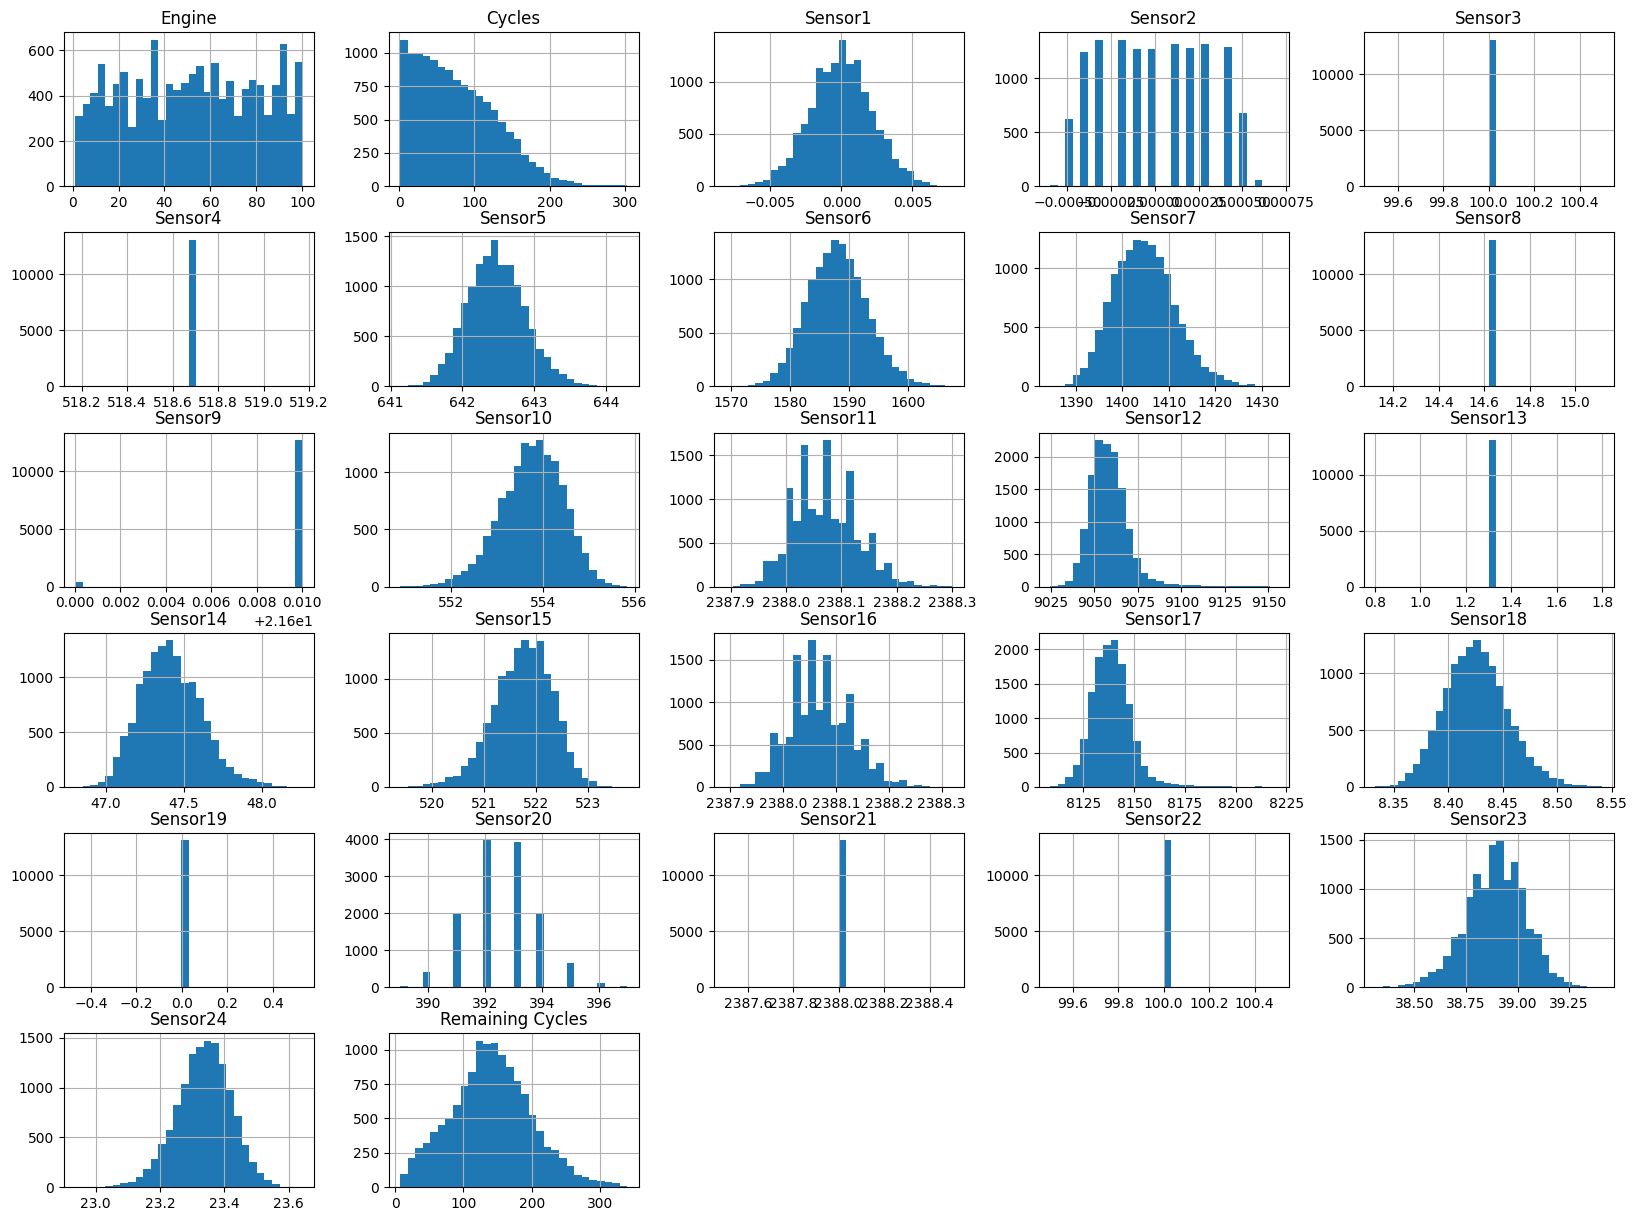

In [11]:
# Histograms

data.hist(bins=30, figsize=(20,15))
plt.show()

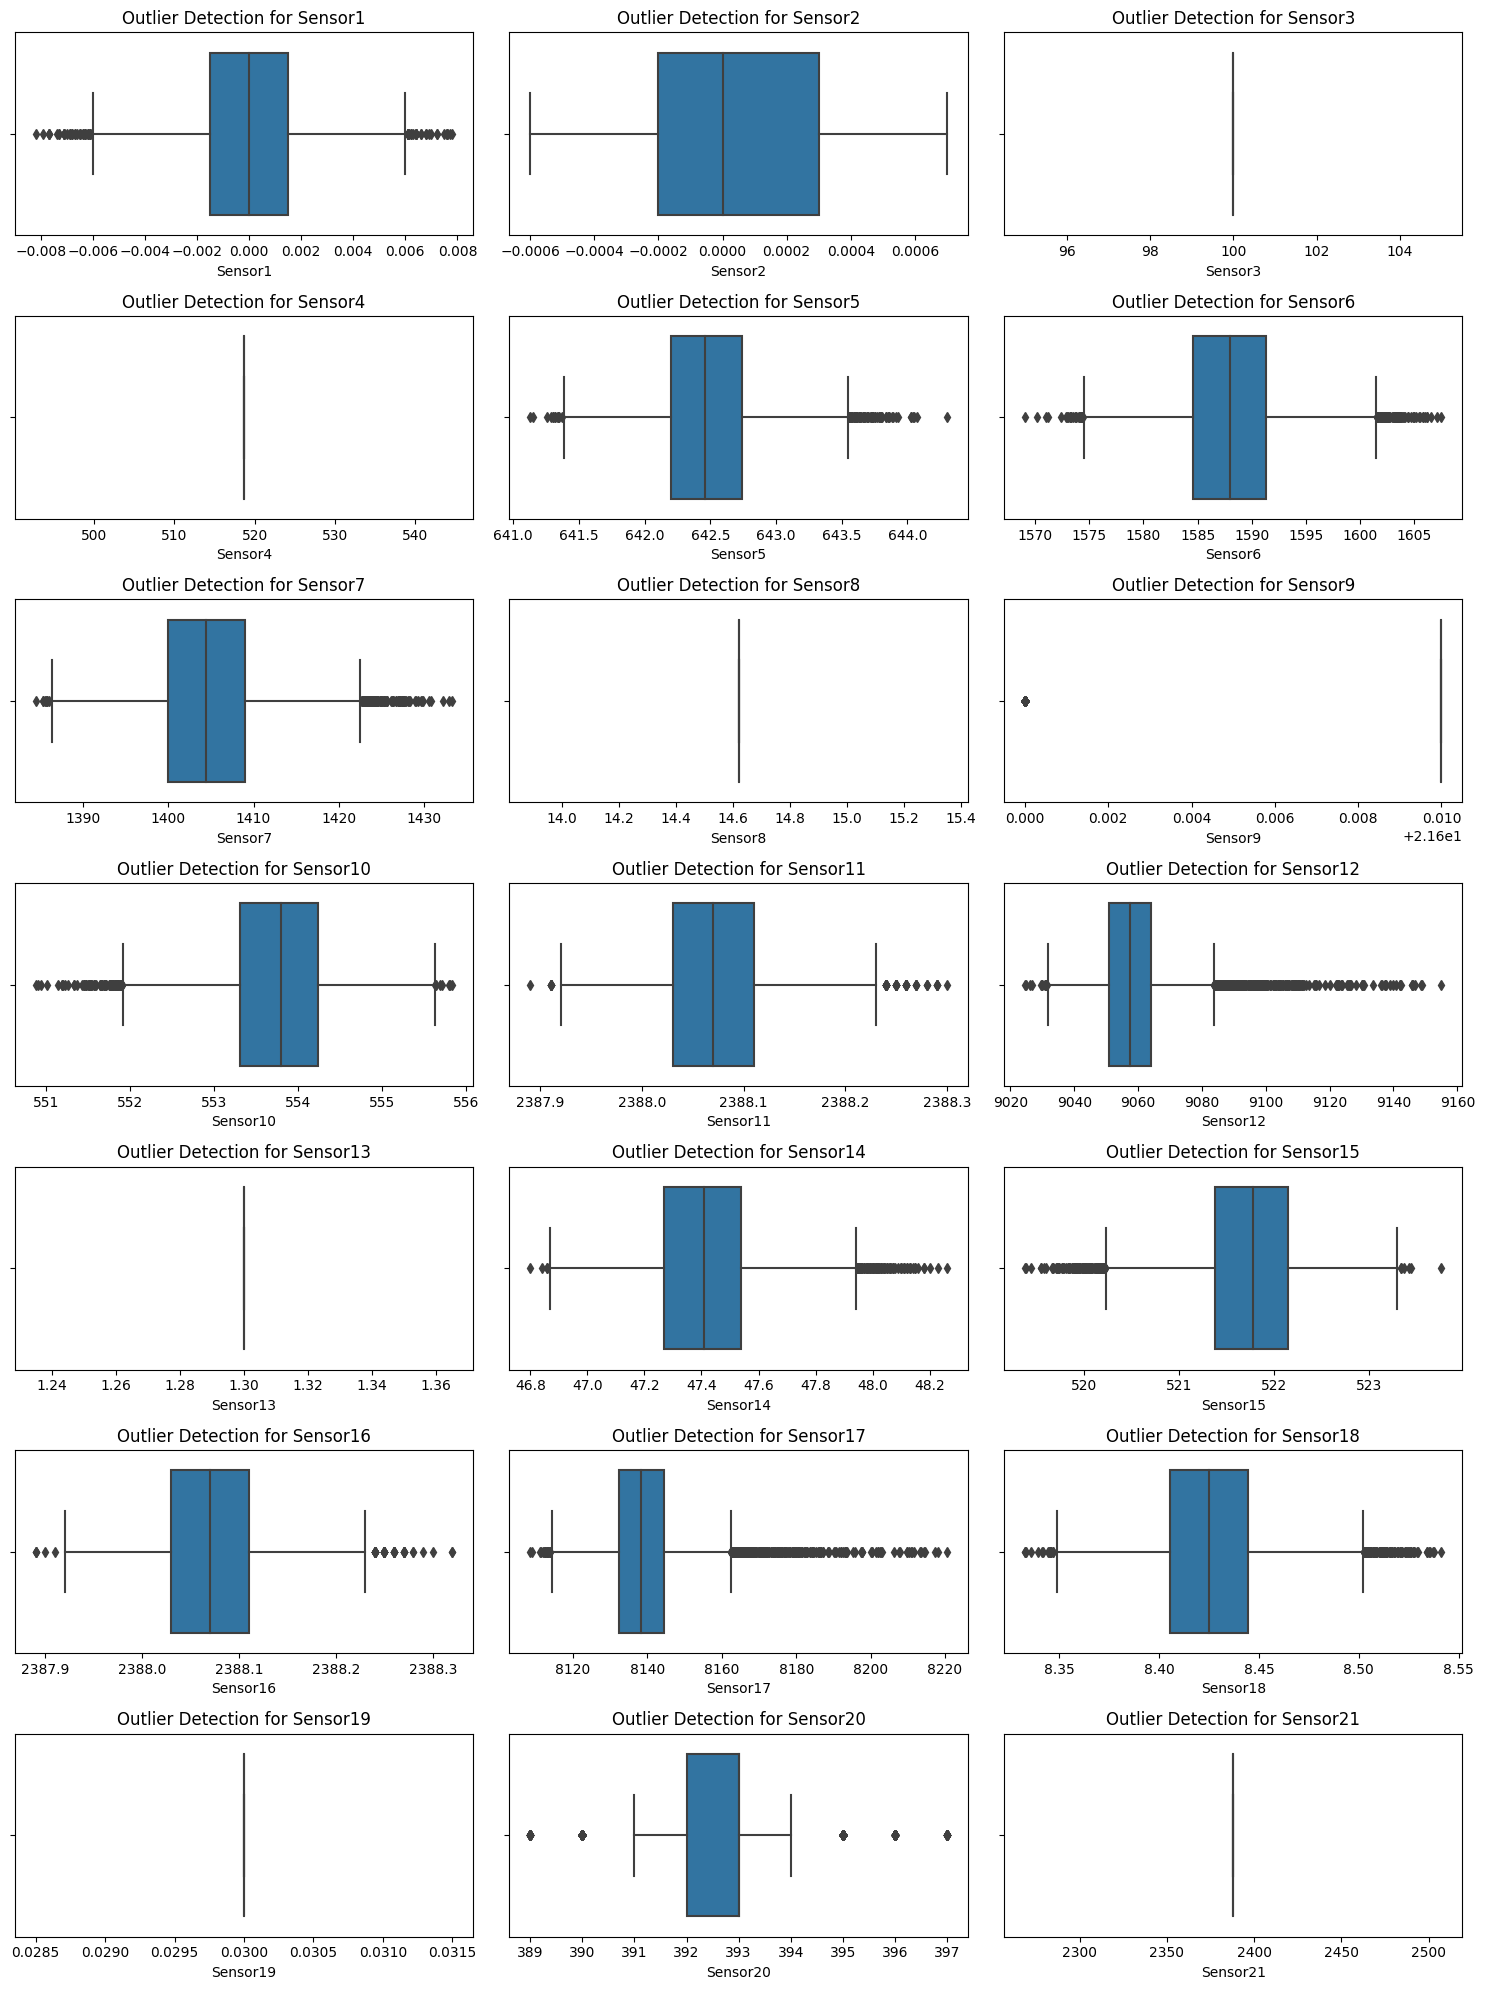

In [12]:
# Boxplots for outlier detection

fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()

for i, col in enumerate(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19', 'Sensor20', 'Sensor21']):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

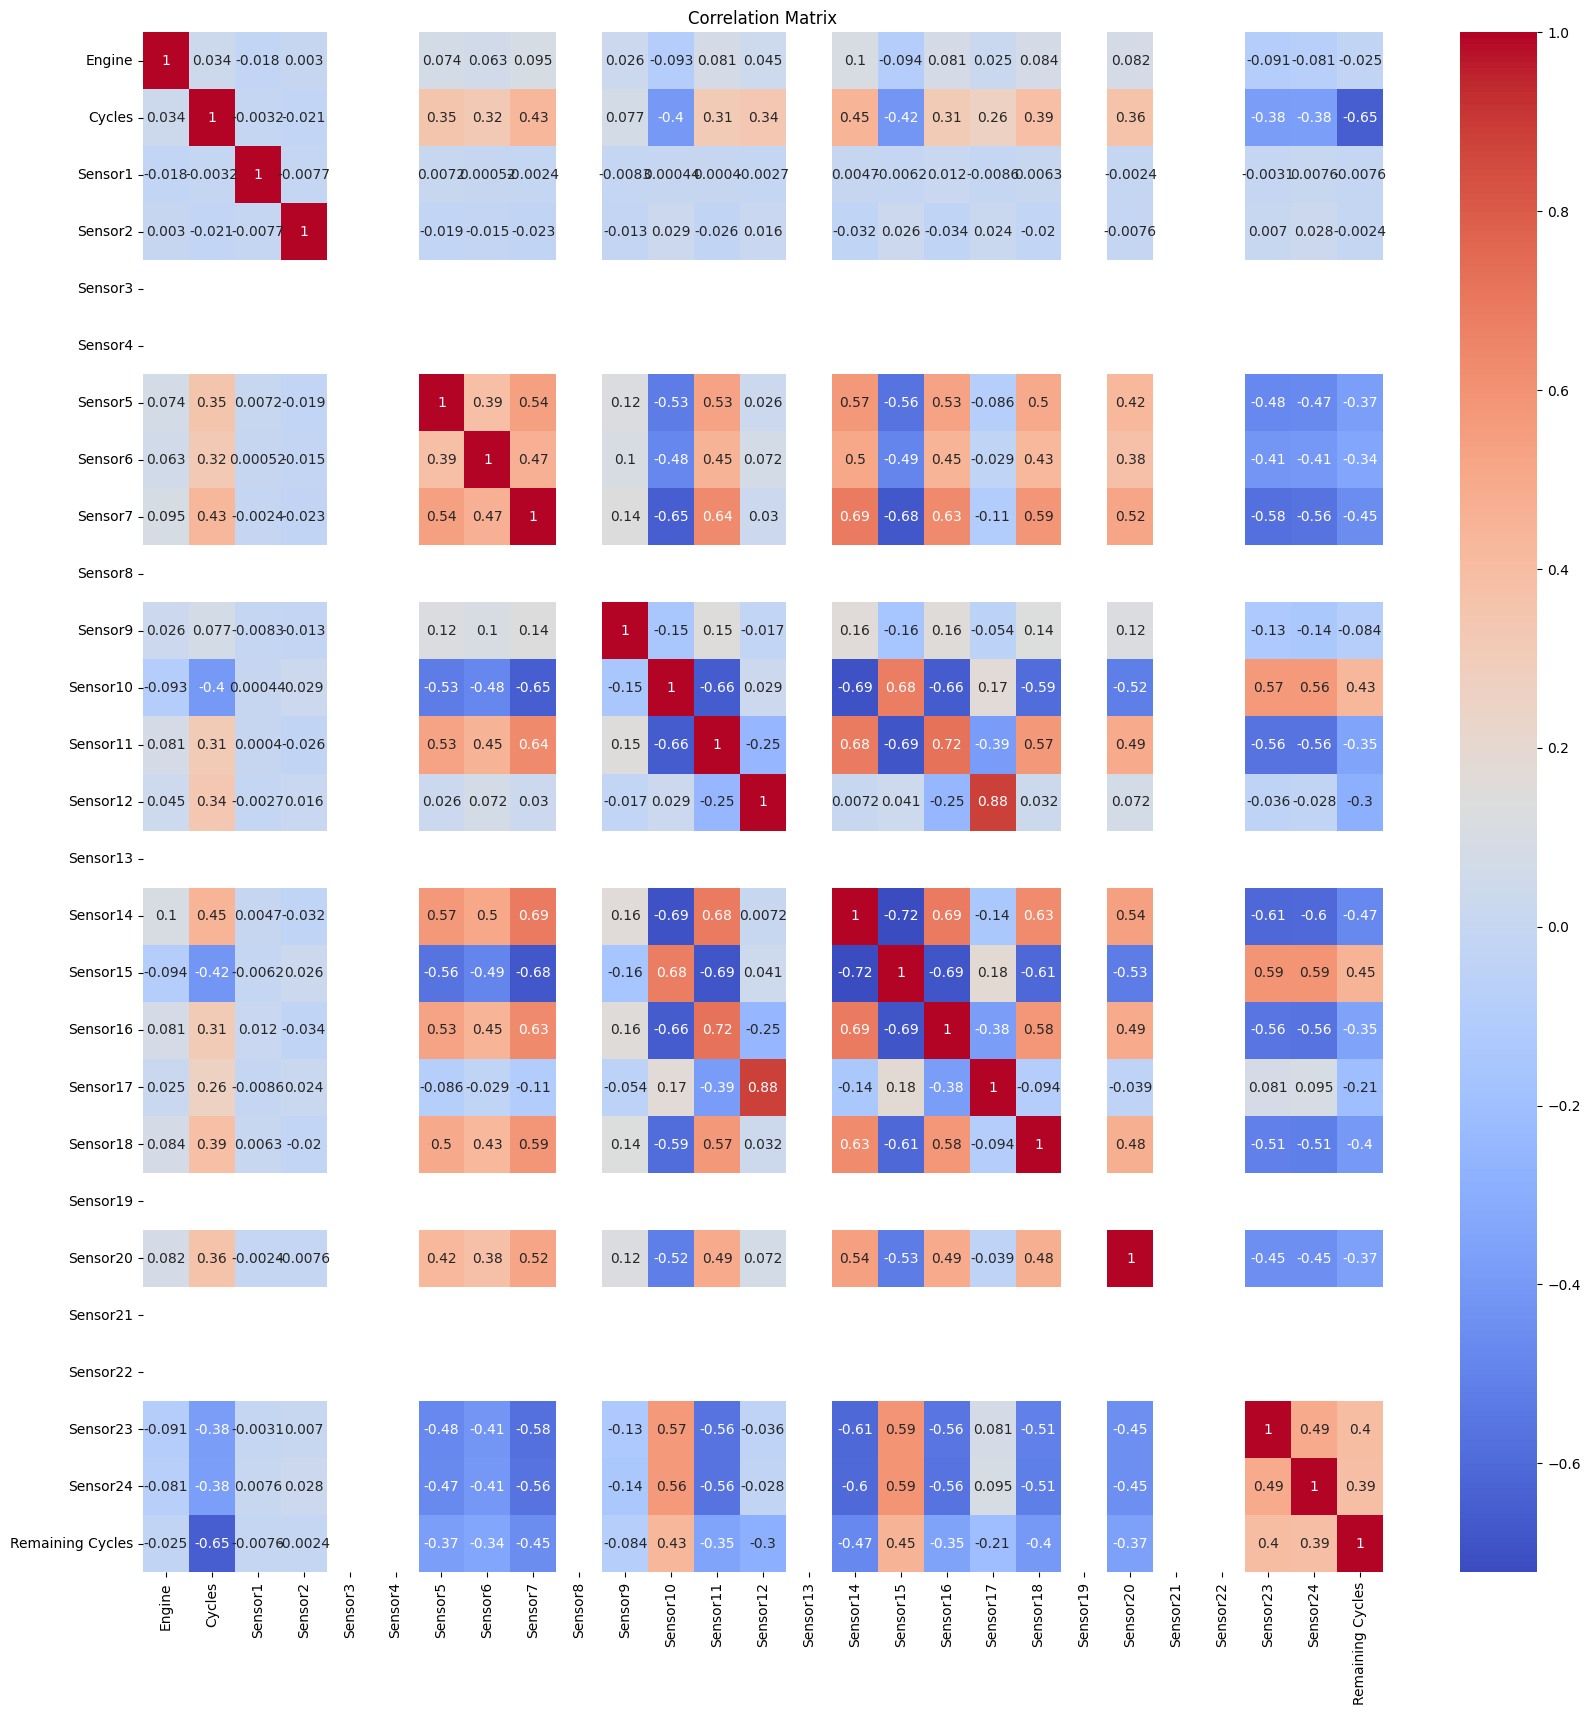

In [13]:
# Correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

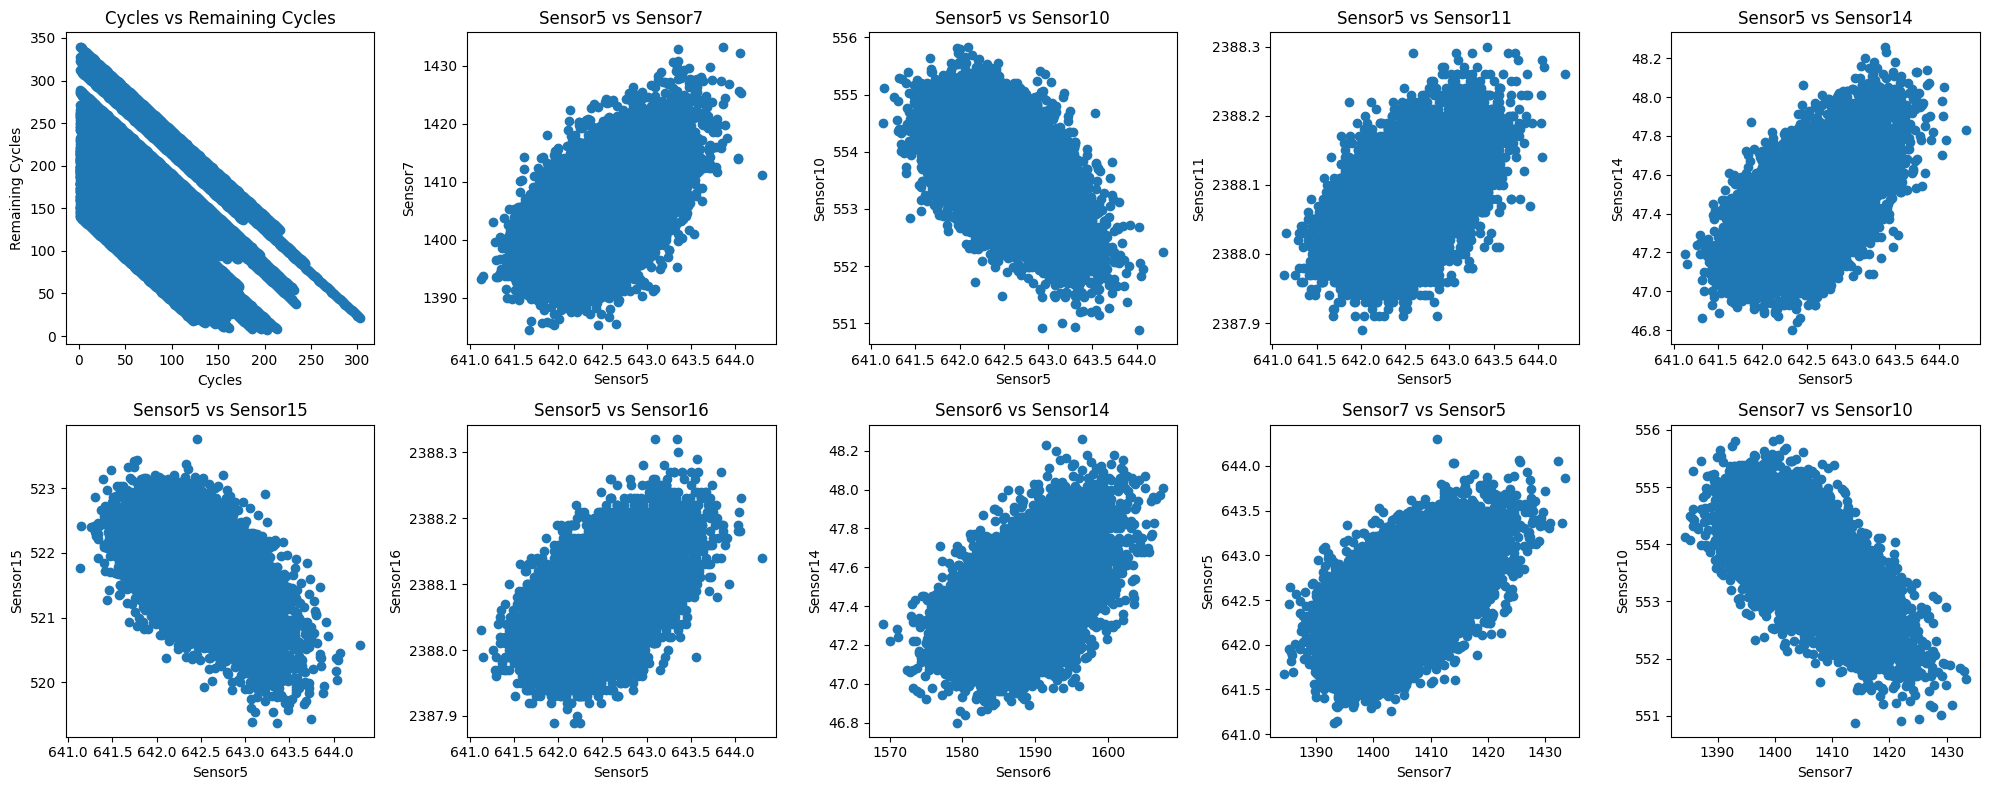

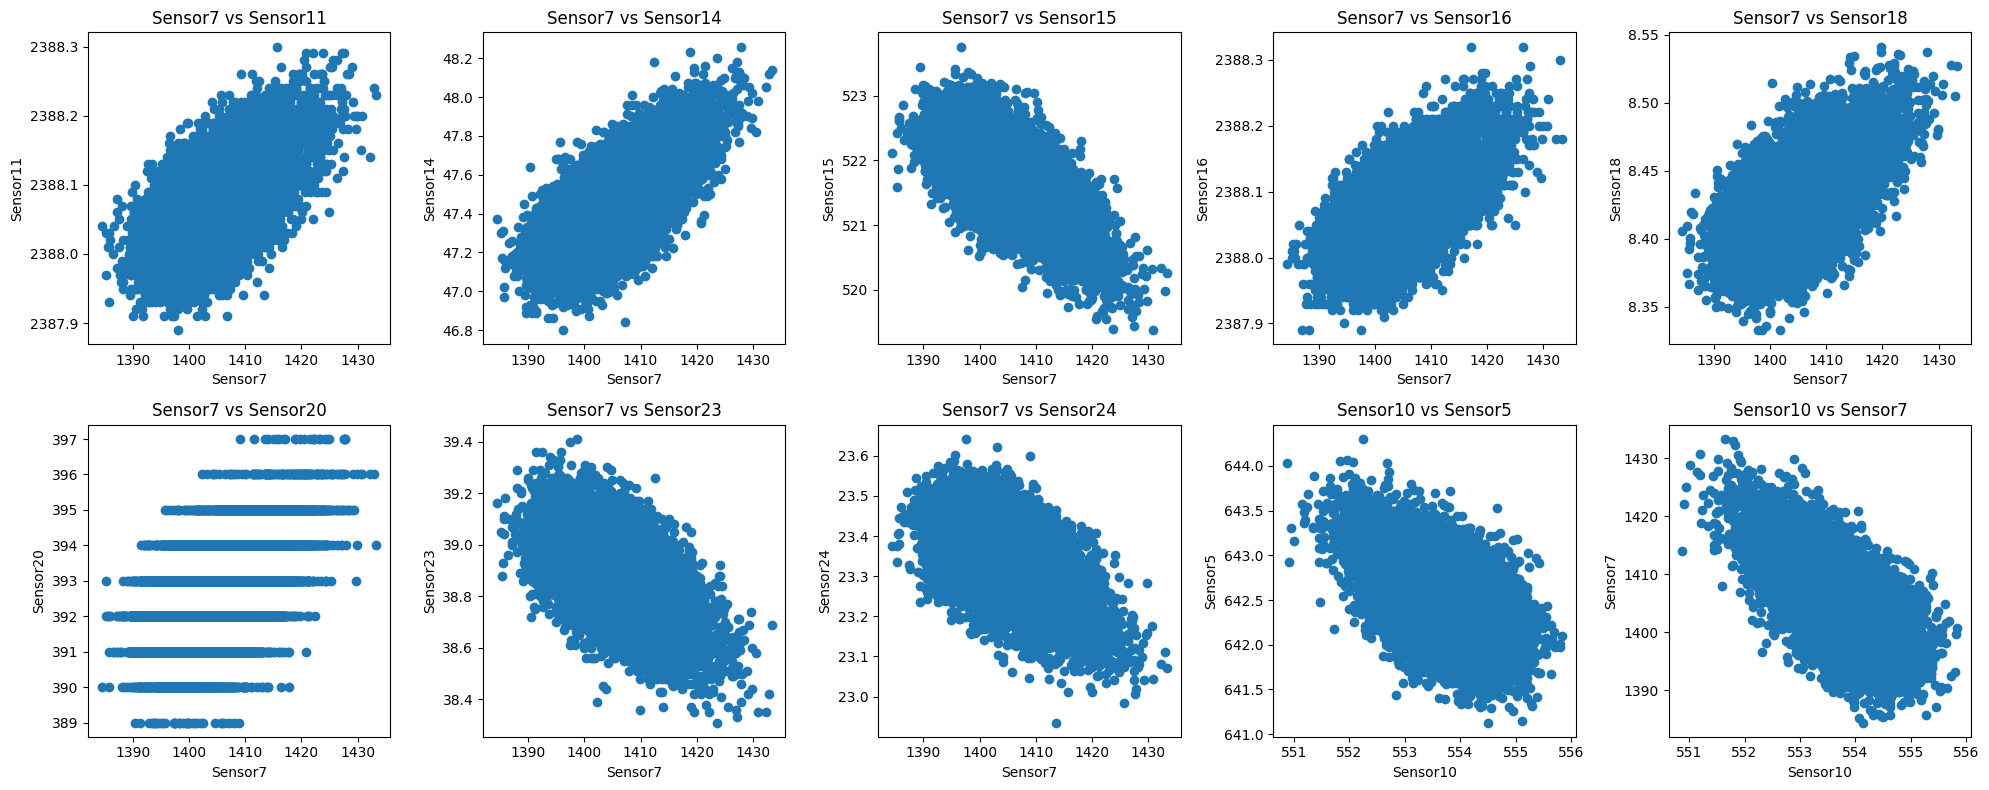

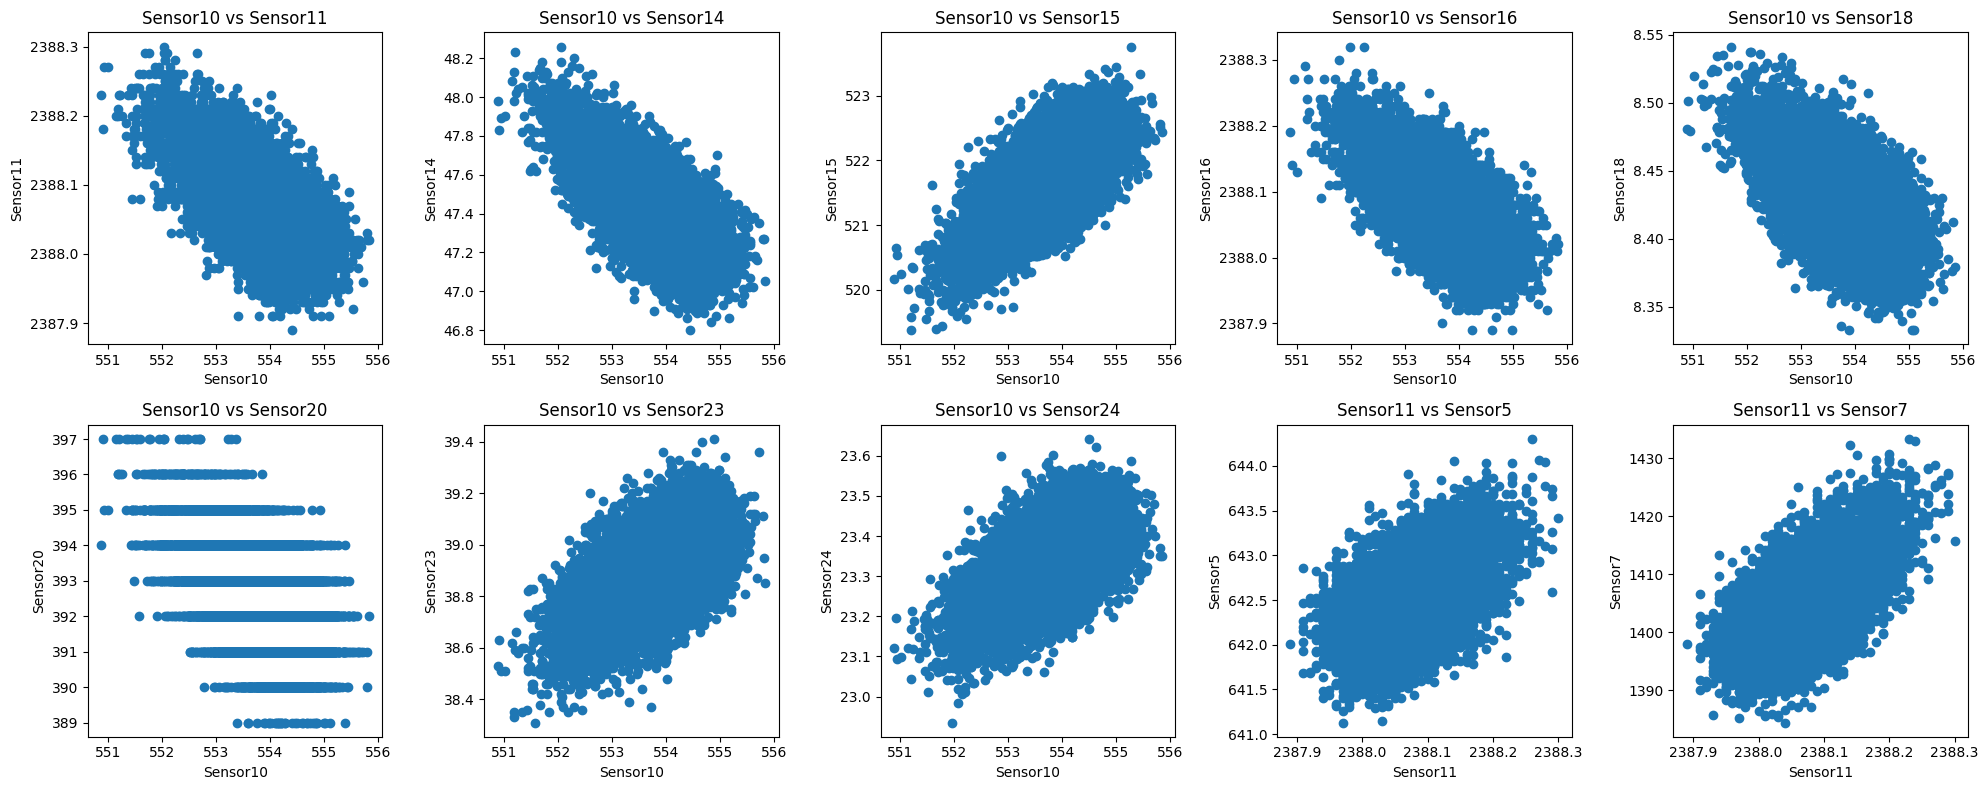

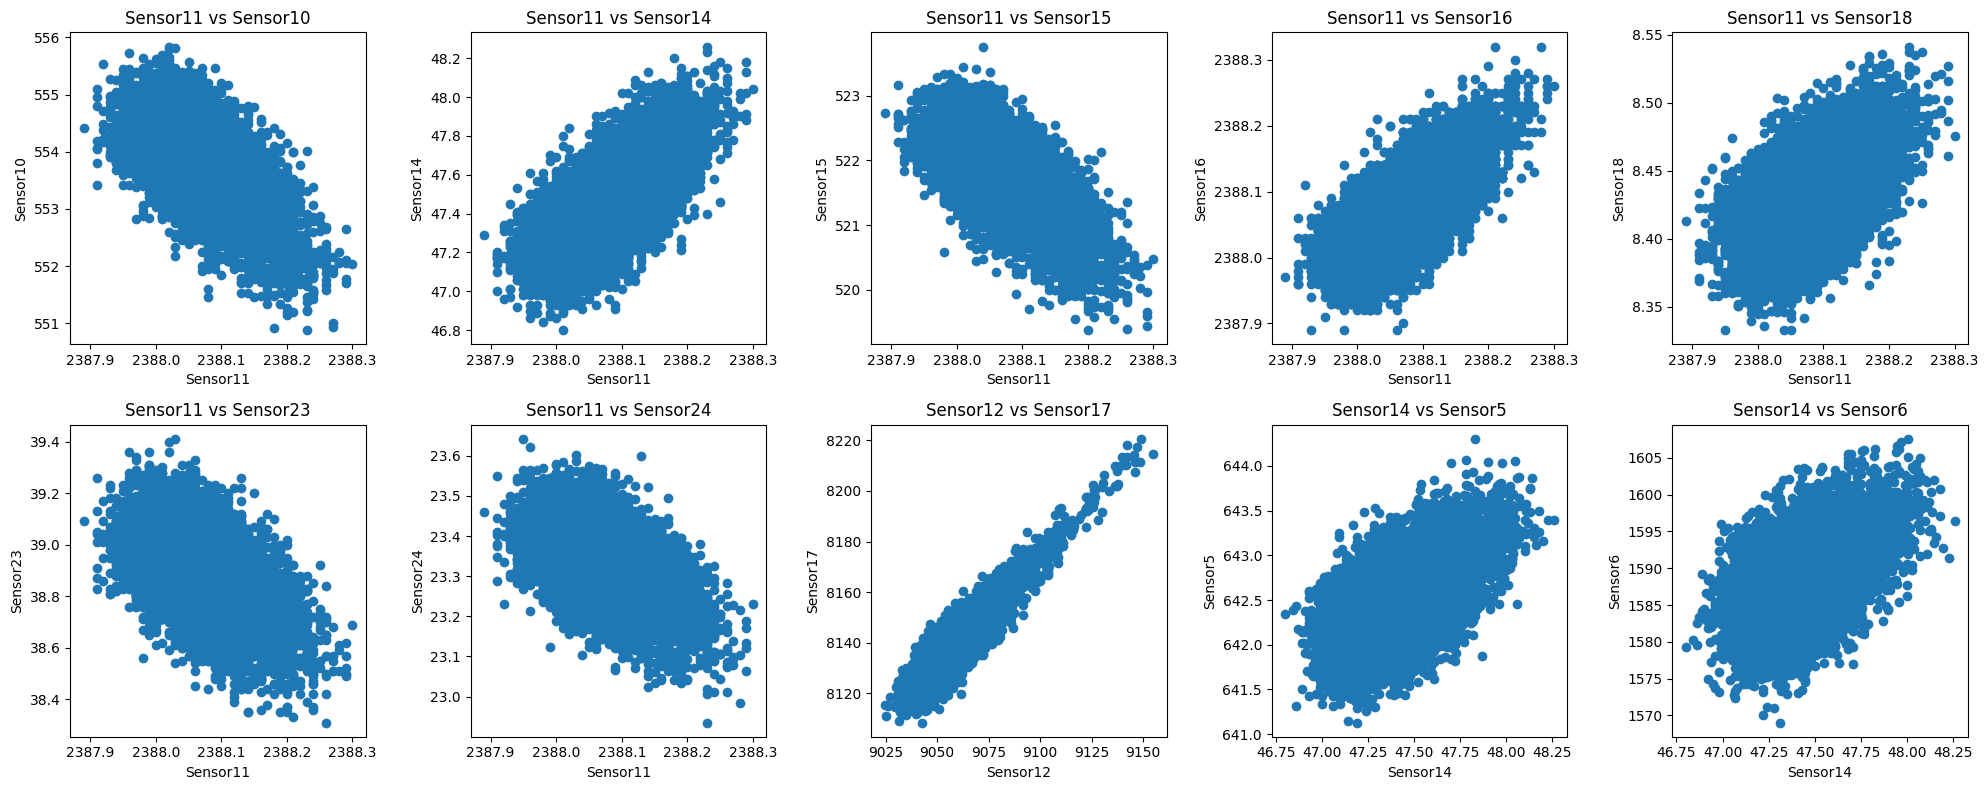

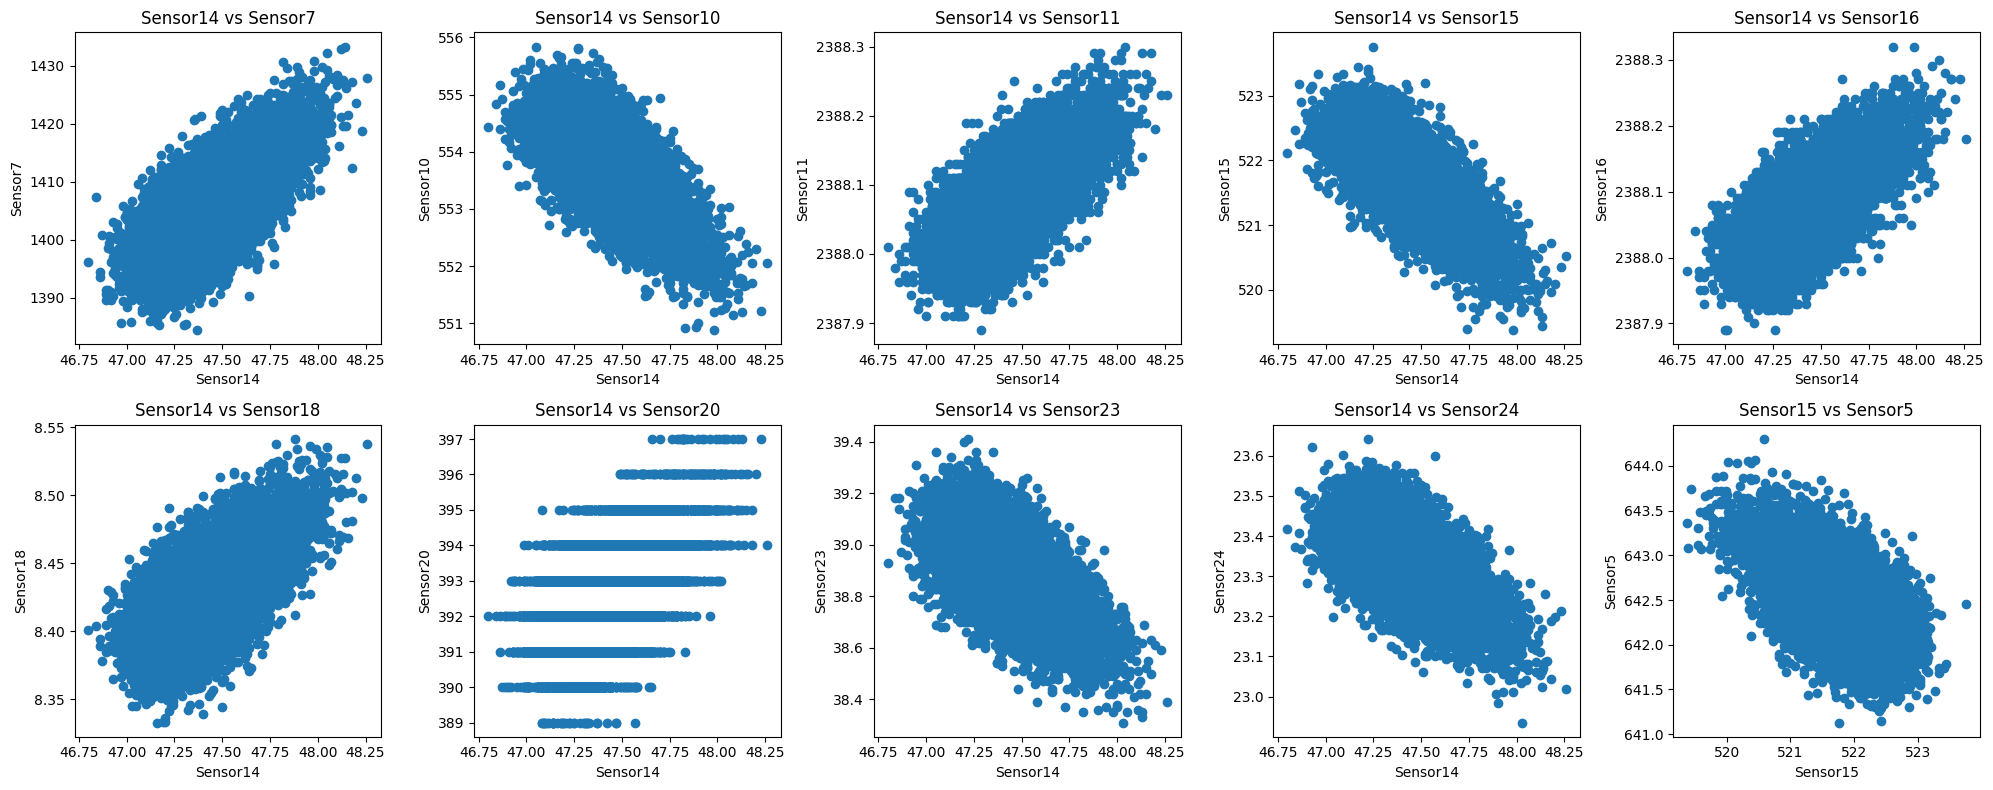

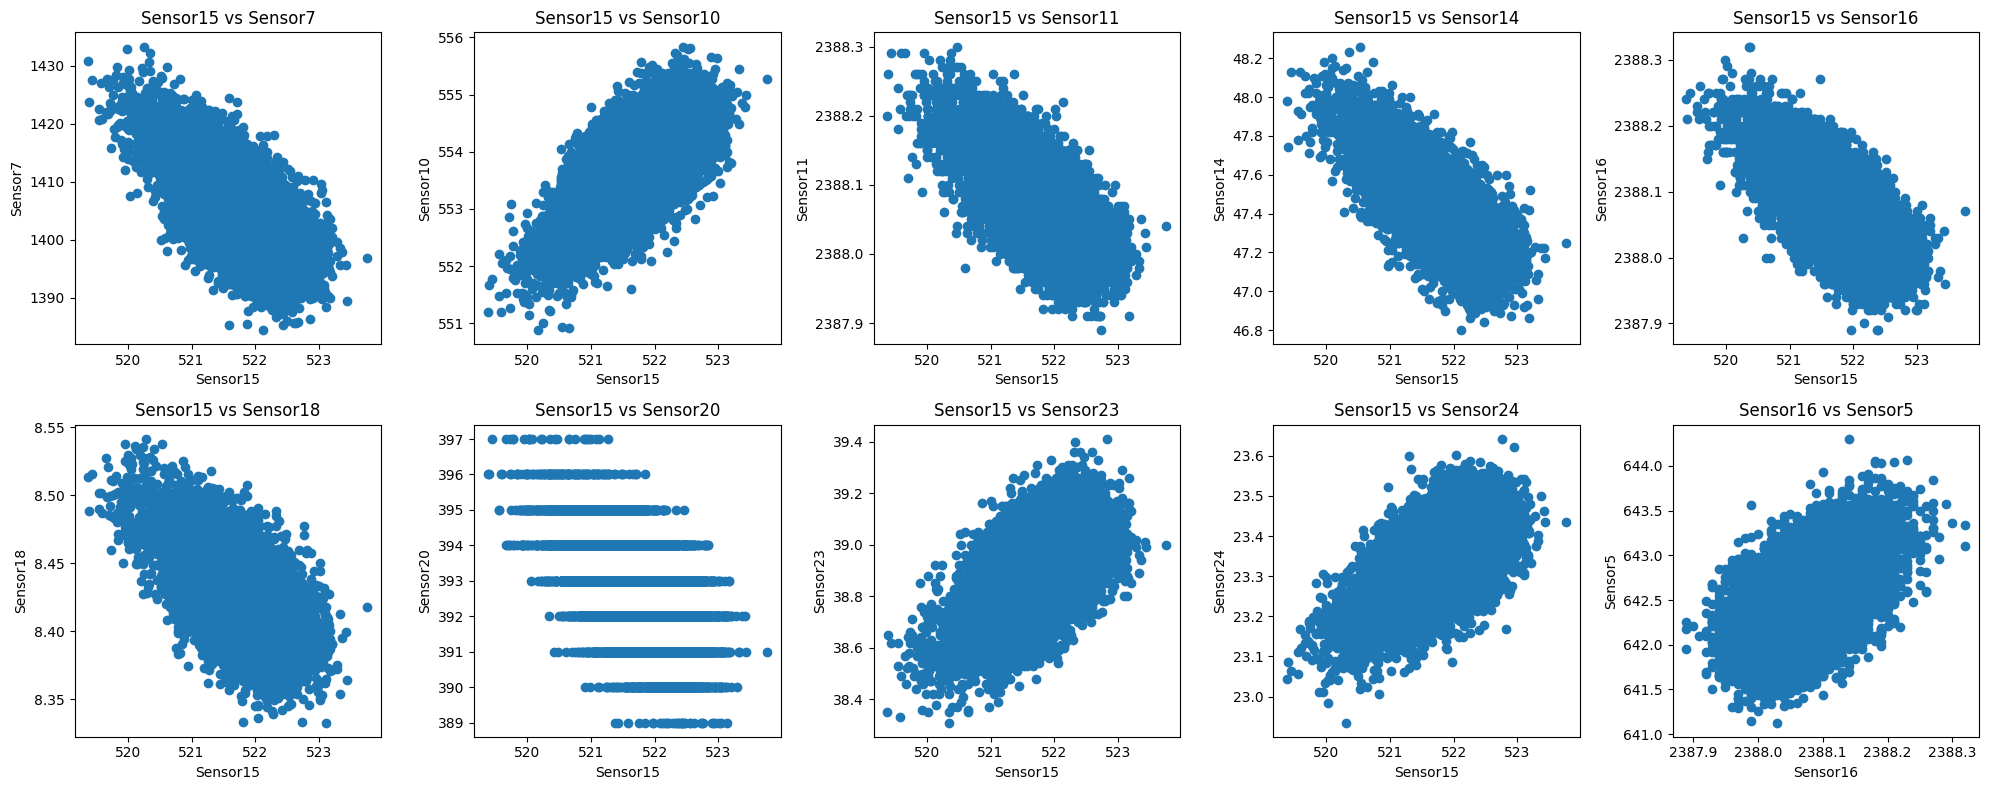

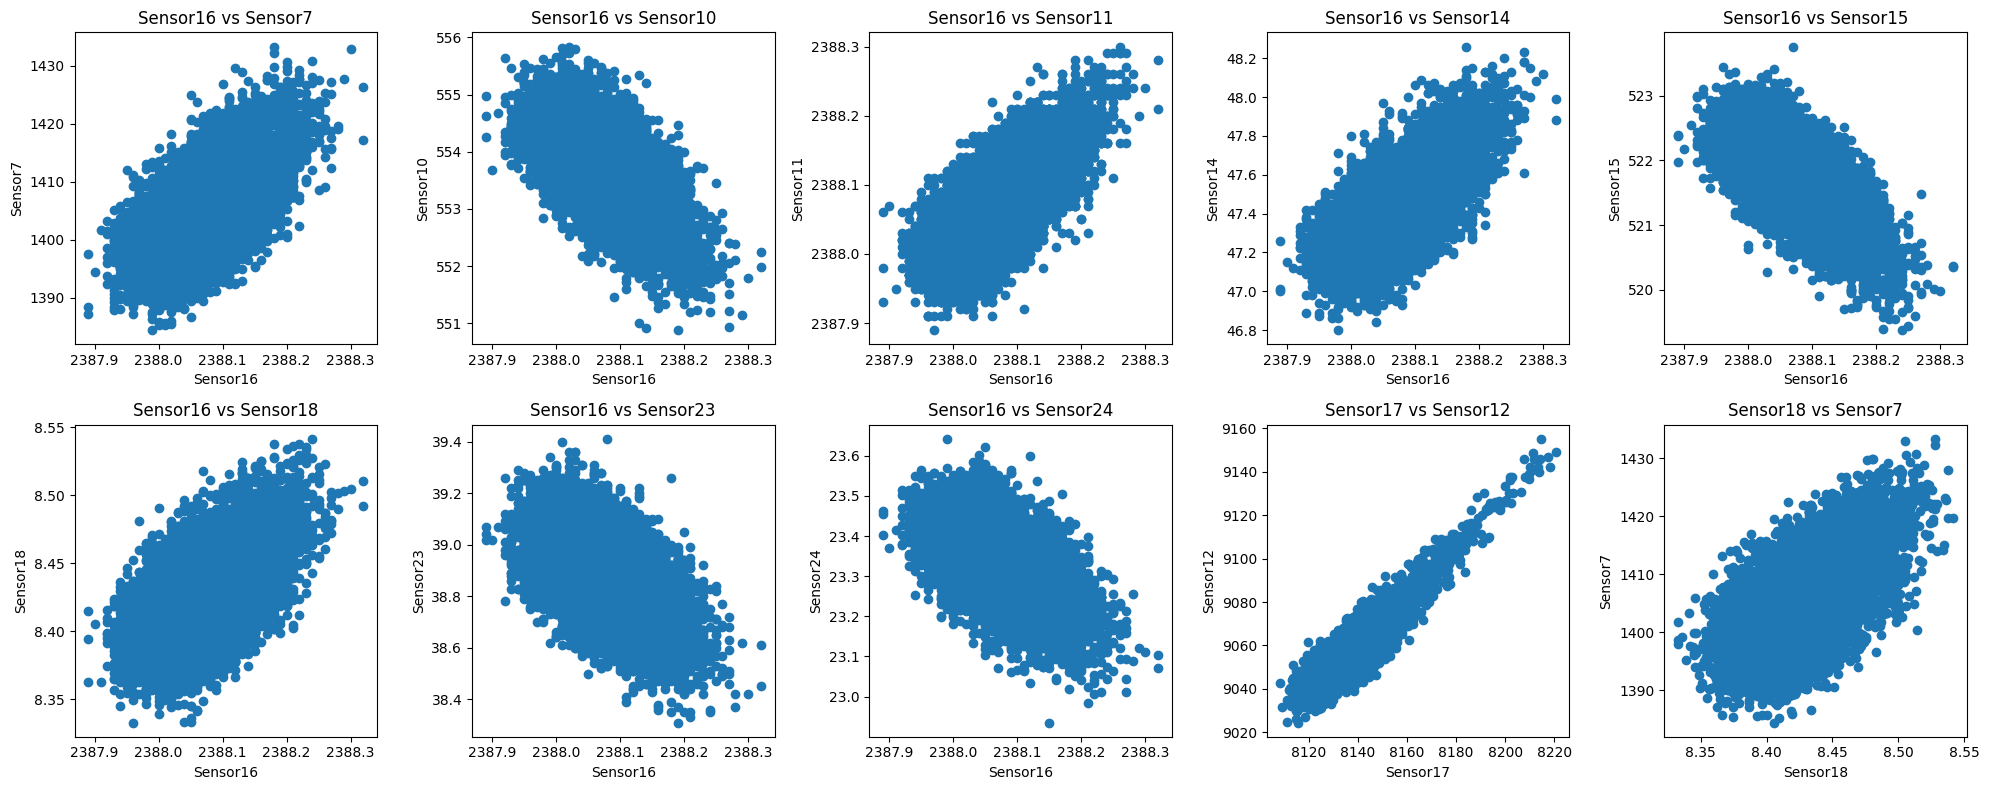

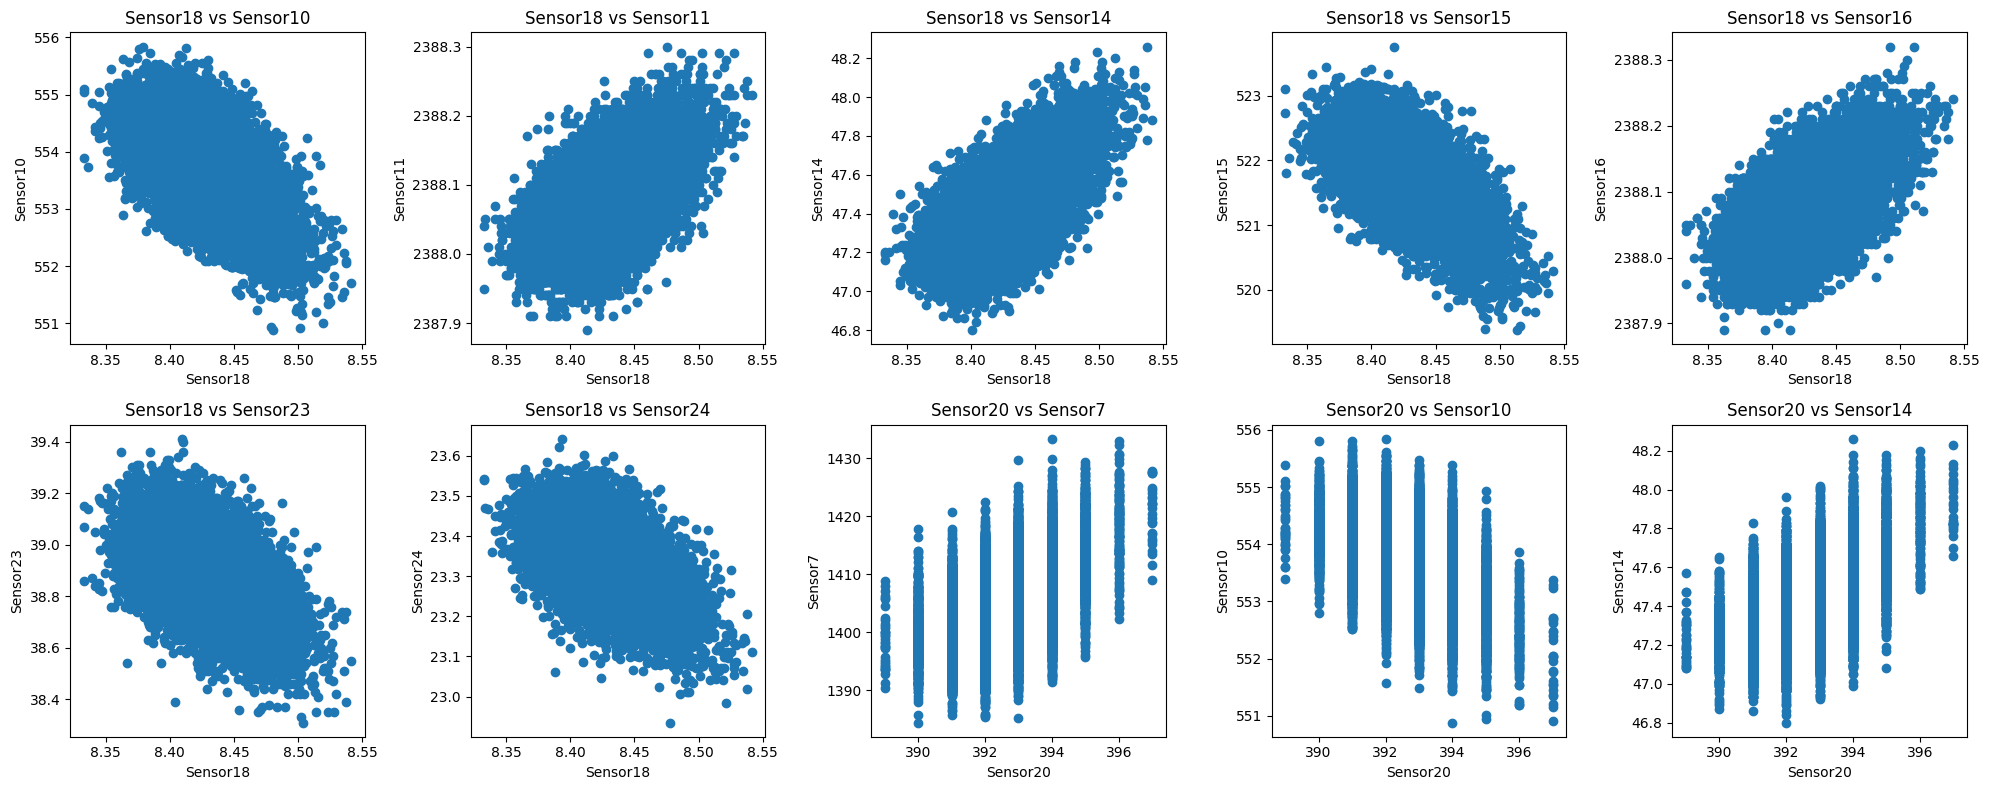

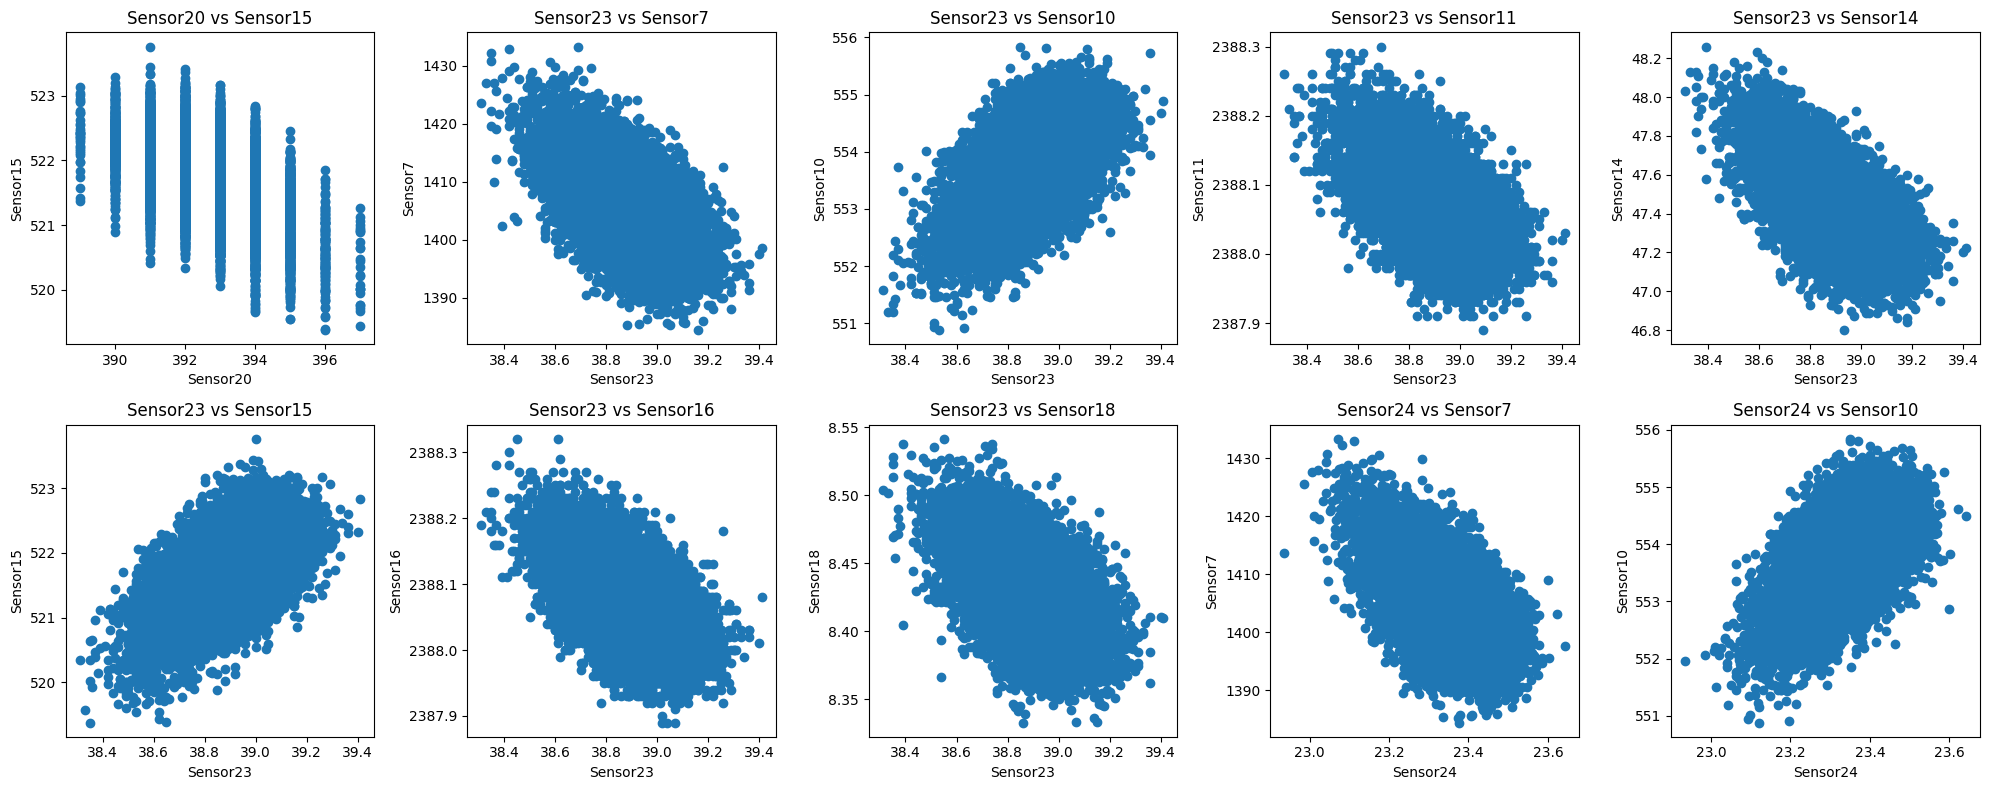

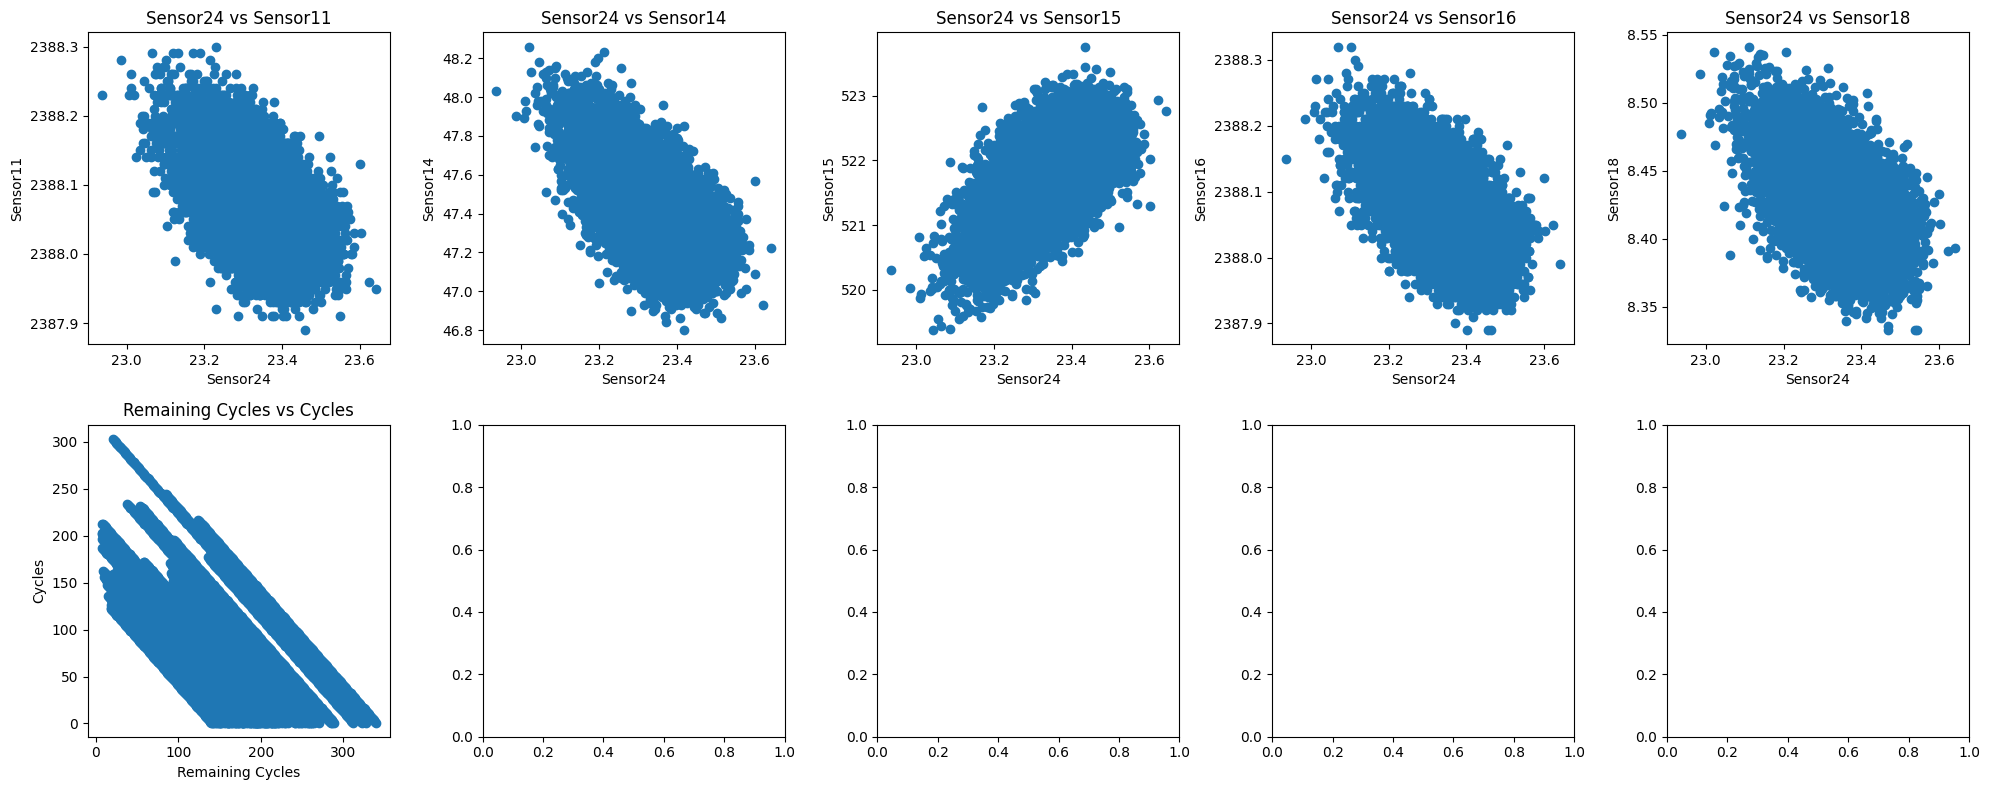

In [14]:
# Scatter plots for bivariate analysis based on Correlation Marrix Value.

corr_matrix = data.corr()
threshold = 0.5
sensors = data.columns

# Number of pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = pairs

for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()

    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)

    plt.tight_layout()
    plt.savefig(f'Scatter plots_{j}.png')  
    plt.show()